Load library

In [37]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pickle

Read and split file

In [38]:
df = pd.read_csv('water_supply.csv')
X_train_validate, X_test, y_train_validate, y_test = train_test_split(df.drop('water', axis=1), df['water'].ravel())

dtrain = xgb.DMatrix(X_train_validate.values, label=y_train_validate.tolist())

fit_params = {
    'eval_metric': 'rmse',
    'eval_set': [[X_train_validate, y_train_validate]]
}

Range of grid search

In [39]:
params = {
    'learning_rate': list(np.arange(0.05, 0.61, 0.05)),
    'max_depth': list(np.arange(1, 16, 1))
}

Fit for Grid search

In [ ]:
def GSfit(params):
    regressor = xgb.XGBRegressor(n_estimators=100)
    grid = GridSearchCV(regressor, params, cv=3, fit_params=fit_params, scoring='neg_mean_squared_error', verbose=2, return_train_score=True)
    grid.fit(X_train_validate,y_train_validate)
    return grid

Grid search

In [ ]:
grid = GSfit(params)
grid_best_params = grid.best_params_
grid_scores_df = pd.DataFrame(grid.cv_results_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] learning_rate=0.05, max_depth=1 .................................
[13:13:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.434
[1]	validation_0-rmse:38.6188
[2]	validation_0-rmse:36.9035
[3]	validation_0-rmse:35.2837
[4]	validation_0-rmse:33.7547
[5]	validation_0-rmse:32.3124
[6]	validation_0-rmse:30.9528
[7]	validation_0-rmse:29.6719
[8]	validation_0-rmse:28.454
[9]	validation_0-rmse:27.3119
[10]	validation_0-rmse:26.2258
[11]	validation_0-rmse:25.2082
[12]	validation_0-rmse:24.2418
[13]	validation_0-rmse:23.3381
[14]	validation_0-rmse:22.4797
[15]	validation_0-rmse:21.6788
[16]	validation_0-rmse:20.9182
[17]	validation_0-rmse:20.209
[18]	validation_0-rmse:19.5372
[19]	validation_0-rmse:18.9093
[20]	validation_0-rmse:18.3199
[21]	validation_0-rmse:17.7668
[22]	validation_0-rmse:17.2477
[23]	validation_0-rmse:16.7616
[24]	validation_0-r

/Users/watarium/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_search.py:584: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


[35]	validation_0-rmse:12.9063
[36]	validation_0-rmse:12.7073
[37]	validation_0-rmse:12.5232
[38]	validation_0-rmse:12.3508
[39]	validation_0-rmse:12.1916
[40]	validation_0-rmse:12.0408
[41]	validation_0-rmse:11.8994
[42]	validation_0-rmse:11.7691
[43]	validation_0-rmse:11.6451
[44]	validation_0-rmse:11.5289
[45]	validation_0-rmse:11.4215
[46]	validation_0-rmse:11.3183
[47]	validation_0-rmse:11.2207
[48]	validation_0-rmse:11.1316
[49]	validation_0-rmse:11.0468
[50]	validation_0-rmse:10.9653
[51]	validation_0-rmse:10.8907
[52]	validation_0-rmse:10.8177
[53]	validation_0-rmse:10.749
[54]	validation_0-rmse:10.6861
[55]	validation_0-rmse:10.6252
[56]	validation_0-rmse:10.5668
[57]	validation_0-rmse:10.5132
[58]	validation_0-rmse:10.4614
[59]	validation_0-rmse:10.4096
[60]	validation_0-rmse:10.3617
[61]	validation_0-rmse:10.3155
[62]	validation_0-rmse:10.2714
[63]	validation_0-rmse:10.2286
[64]	validation_0-rmse:10.1858
[65]	validation_0-rmse:10.1435
[66]	validation_0-rmse:10.1038
[67]	vali

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[49]	validation_0-rmse:10.92
[50]	validation_0-rmse:10.8401
[51]	validation_0-rmse:10.7677
[52]	validation_0-rmse:10.6959
[53]	validation_0-rmse:10.6287
[54]	validation_0-rmse:10.5663
[55]	validation_0-rmse:10.5057
[56]	validation_0-rmse:10.4518
[57]	validation_0-rmse:10.3967
[58]	validation_0-rmse:10.3449
[59]	validation_0-rmse:10.2973
[60]	validation_0-rmse:10.2499
[61]	validation_0-rmse:10.2023
[62]	validation_0-rmse:10.1583
[63]	validation_0-rmse:10.1142
[64]	validation_0-rmse:10.0758
[65]	validation_0-rmse:10.0358
[66]	validation_0-rmse:9.99546
[67]	validation_0-rmse:9.95737
[68]	validation_0-rmse:9.92022
[69]	validation_0-rmse:9.88343
[70]	validation_0-rmse:9.84846
[71]	validation_0-rmse:9.81725
[72]	validation_0-rmse:9.78286
[73]	validation_0-rmse:9.75021
[74]	validation_0-rmse:9.71757
[75]	validation_0-rmse:9.6865
[76]	validation_0-rmse:9.65526
[77]	validation_0-rmse:9.62615
[78]	validation_0-rmse:9.59619
[79]	validation_0-rmse:9.56643
[80]	validation_0-rmse:9.53845
[81]	valida

Best n by Cross Validation

In [47]:
cv=xgb.cv(grid_best_params, dtrain, num_boost_round=200, nfold=3)
n_best = cv[cv['test-rmse-mean'] == cv['test-rmse-mean'].min()]['test-rmse-mean'].index[0]
grid_best_params['n_estimators'] = n_best + 1

Fit by best params

In [48]:
regressor = xgb.XGBRegressor(learning_rate=grid_best_params['learning_rate'],
                             max_depth=grid_best_params['max_depth'],
                             n_estimators=grid_best_params['n_estimators'])
regressor.fit(X_train_validate, y_train_validate, verbose=False)

[13:33:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=156,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

Save model

In [49]:
pickle.dump(regressor, open('water_supply.pkl', 'wb'))

Prediction

In [50]:
for hour in range(1,24):
    for temperature in range(5,40):
        input = pd.DataFrame([[hour, temperature]], columns=['hour', 'temperature'])
        result = regressor.predict(input)
        print('Hour: ' + str(hour) + '  Temperature: ' + str(temperature) + '  Prediction: ' + str(result[0]))

Hour: 1  Temperature: 5  Prediction: 19.57058
Hour: 1  Temperature: 6  Prediction: 19.670849
Hour: 1  Temperature: 7  Prediction: 19.452555
Hour: 1  Temperature: 8  Prediction: 19.405226
Hour: 1  Temperature: 9  Prediction: 19.654291
Hour: 1  Temperature: 10  Prediction: 19.320606
Hour: 1  Temperature: 11  Prediction: 19.122557
Hour: 1  Temperature: 12  Prediction: 19.15693
Hour: 1  Temperature: 13  Prediction: 19.16425
Hour: 1  Temperature: 14  Prediction: 19.16425
Hour: 1  Temperature: 15  Prediction: 19.366606
Hour: 1  Temperature: 16  Prediction: 19.226349
Hour: 1  Temperature: 17  Prediction: 19.413134
Hour: 1  Temperature: 18  Prediction: 19.621033
Hour: 1  Temperature: 19  Prediction: 19.617073
Hour: 1  Temperature: 20  Prediction: 19.57237
Hour: 1  Temperature: 21  Prediction: 19.654346
Hour: 1  Temperature: 22  Prediction: 20.8516
Hour: 1  Temperature: 23  Prediction: 21.6886
Hour: 1  Temperature: 24  Prediction: 22.398079
Hour: 1  Temperature: 25  Prediction: 23.479582
Hour: 

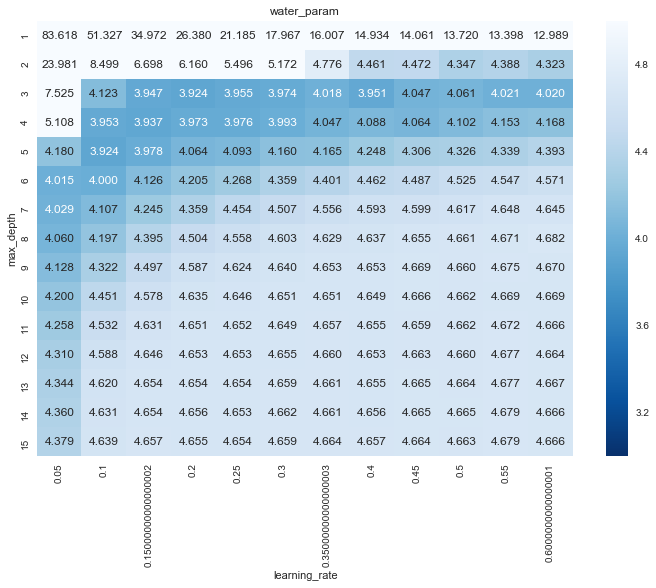

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# parameter vs validation error
plt.rcParams["font.size"] = 12
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

param_pivot = grid_scores_df.pivot_table(index=['param_max_depth'], columns=['param_learning_rate'], values=['mean_test_score']) * -1

sns.heatmap(param_pivot.loc[:,'mean_test_score'],
            ax=ax, vmin=3.0, vmax=5.0, annot=True, fmt="1.3f", cmap='Blues_r')

#ax.set_label()
ax.set_title('water_param') #title
ax.set_xlabel('learning_rate') #x label
ax.set_ylabel('max_depth') #y label
 
plt.savefig('./graph/water_heatmap.png', bbox_inches="tight")
plt.show()